In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, log_loss, silhouette_score, mean_squared_error
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaseEnsemble, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.cluster.hierarchy import linkage, dendrogram
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import AgglomerativeClustering, KMeans
from statsmodels.tsa.api import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv(r"..\Datasets\AirPassengers.csv")
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [16]:
y_train = df['Passengers'][:-12]
y_test = df['Passengers'][-12:]

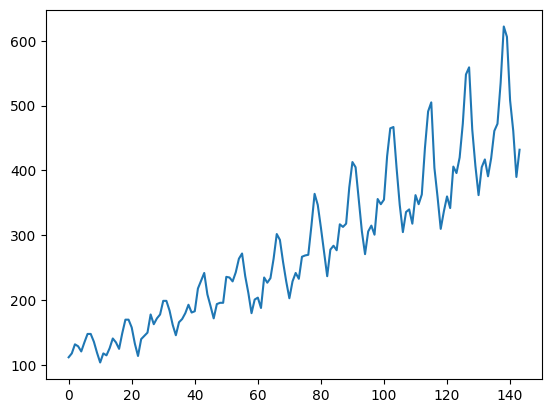

In [17]:
plt.plot(df['Passengers'])

### HW add auto

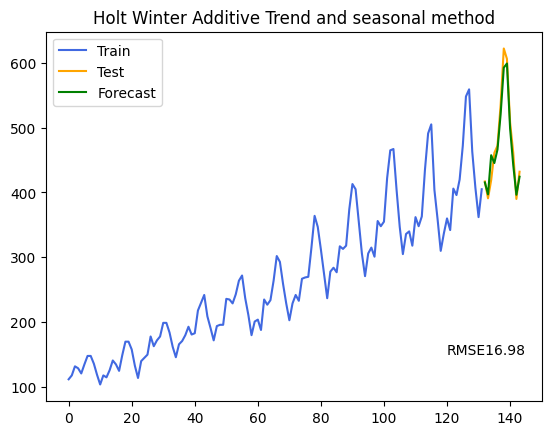

{'smoothing_level': 0.25115201910803775, 'smoothing_trend': 5.511265101309586e-07, 'smoothing_seasonal': 0.7488432944596914, 'damping_trend': nan, 'initial_level': 118.53317058994472, 'initial_trend': 2.5575268620102642, 'initial_seasons': array([ -9.13687916,  -3.51487085,   9.01033251,   3.74480341,
        -4.96419336,   9.17920163,  21.40466267,  18.91381099,
         4.65739715, -14.30194215, -28.87216654, -12.30381358]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
16.979968673445825


In [18]:

from math import sqrt
from statsmodels.tsa.api import Holt

holt_add = ExponentialSmoothing(y_train, seasonal_periods=12,
                                trend='add', seasonal='add')
fit1 = holt_add.fit()

fcast1 = fit1.forecast(len(y_test))

y_train.plot(color= 'royalblue', label = 'Train')
y_test.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(120,150, 'RMSE'+str(error))
plt.title('Holt Winter Additive Trend and seasonal method')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_test, fcast1))
print(res)

### HW mul auto

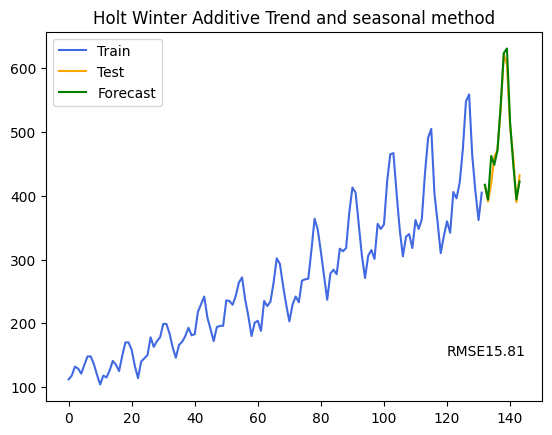

{'smoothing_level': 0.37620416239690907, 'smoothing_trend': 3.004533202062906e-06, 'smoothing_seasonal': 0.6237955193253111, 'damping_trend': nan, 'initial_level': 115.17136872558663, 'initial_trend': 2.7882863489833145, 'initial_seasons': array([0.94950357, 0.99958992, 1.09866683, 1.04448582, 0.96524033,
       1.05514187, 1.14823165, 1.13309063, 1.03310138, 0.90060904,
       0.8010059 , 0.92381485]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
15.809562602748581


In [19]:

from math import sqrt
from statsmodels.tsa.api import Holt

holt_add = ExponentialSmoothing(y_train, seasonal_periods=12,
                                trend='add', seasonal='mul')
fit1 = holt_add.fit()

fcast1 = fit1.forecast(len(y_test))

y_train.plot(color= 'royalblue', label = 'Train')
y_test.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(120,150, 'RMSE'+str(error))
plt.title('Holt Winter Additive Trend and seasonal method')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_test, fcast1))
print(res)

### HW add damped auto

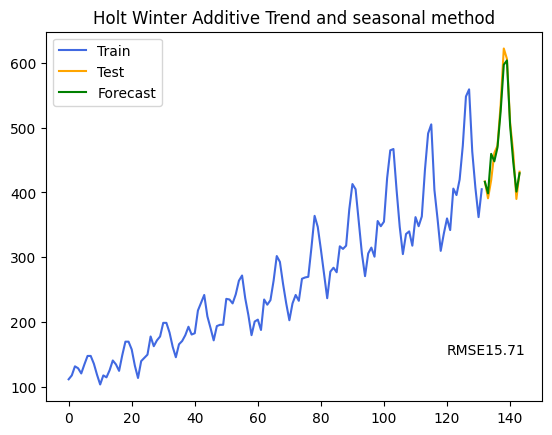

{'smoothing_level': 0.26135662160496637, 'smoothing_trend': 0.043200897273435, 'smoothing_seasonal': 0.7386433783950337, 'damping_trend': 0.995, 'initial_level': 119.91568394010157, 'initial_trend': 1.8832286943132748, 'initial_seasons': array([ -9.72449147,  -4.07023086,   8.55864995,   3.28448175,
        -5.25432063,   9.0689848 ,  21.4430834 ,  19.19084722,
         5.14981198, -13.52206024, -27.81889827, -11.01318877]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
15.705585209587456


In [20]:

from math import sqrt
from statsmodels.tsa.api import Holt

holt_add = ExponentialSmoothing(y_train, seasonal_periods=12,
                                trend='add', seasonal='add',
                                damped_trend=True)
fit1 = holt_add.fit()

fcast1 = fit1.forecast(len(y_test))

y_train.plot(color= 'royalblue', label = 'Train')
y_test.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(120,150, 'RMSE'+str(error))
plt.title('Holt Winter Additive Trend and seasonal method')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_test, fcast1))
print(res)

### HW mul damped auto

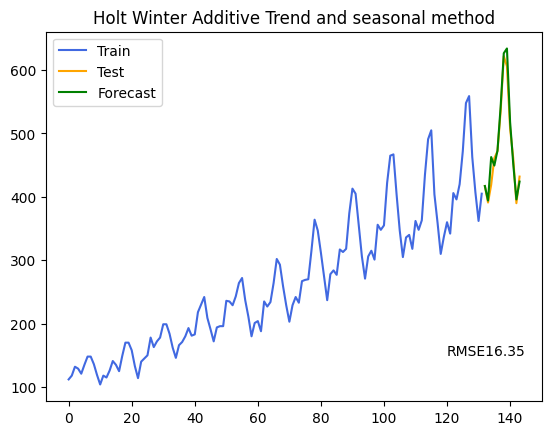

{'smoothing_level': 0.37746542802783545, 'smoothing_trend': 0.03578616034043605, 'smoothing_seasonal': 0.6078788586648216, 'damping_trend': 0.9923164591443895, 'initial_level': 99.8096755485817, 'initial_trend': 2.0093378878159833, 'initial_seasons': array([1.10675339, 1.1629444 , 1.27901406, 1.20947247, 1.11645287,
       1.22066665, 1.33317294, 1.31508565, 1.20030317, 1.04434567,
       0.92984442, 1.07983176]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
16.34560974644317


In [21]:

from math import sqrt
from statsmodels.tsa.api import Holt

holt_add = ExponentialSmoothing(y_train, seasonal_periods=12,
                                trend='add', seasonal='mul',
                                damped_trend=True)
fit1 = holt_add.fit()

fcast1 = fit1.forecast(len(y_test))

y_train.plot(color= 'royalblue', label = 'Train')
y_test.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(120,150, 'RMSE'+str(error))
plt.title('Holt Winter Additive Trend and seasonal method')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_test, fcast1))
print(res)

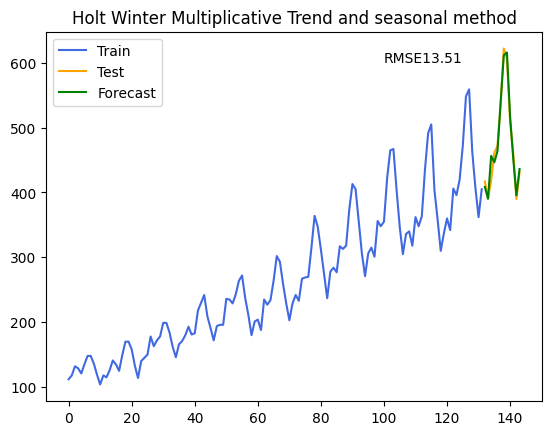

{'smoothing_level': 0.1, 'smoothing_trend': 0.95, 'smoothing_seasonal': 0.3, 'damping_trend': nan, 'initial_level': 120.78550290362969, 'initial_trend': 0.5341472988640863, 'initial_seasons': array([0.95105153, 0.95007574, 1.0782935 , 1.04126553, 1.01443753,
       1.10721675, 1.21938372, 1.21028304, 1.05825229, 0.92780297,
       0.82509993, 0.93642538]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
13.508692941411722


In [22]:
alpha = 0.1
beta = 0.95
gamma = 0.3

from math import sqrt
from statsmodels.tsa.api import Holt

holt_mul = ExponentialSmoothing(y_train, seasonal_periods=12,
                                trend='add', seasonal='mul')
fit1 = holt_mul.fit(smoothing_level = alpha, smoothing_trend = beta,
                    smoothing_seasonal = gamma)

fcast1 = fit1.forecast(len(y_test))

y_train.plot(color= 'royalblue', label = 'Train')
y_test.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(100,600, 'RMSE'+str(error))
plt.title('Holt Winter Multiplicative Trend and seasonal method')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_test, fcast1))
print(res)